# Traffic Prediction Linear Regrassion

In [1]:
# Import Libraries
import numpy as np # For Math
import pandas as pd # For Data Visualization
import matplotlib.pyplot as plt # For Graph
import seaborn as sns # For Advence Graph

from sklearn.model_selection import train_test_split # Import function to split dataset into training and testing sets
from sklearn.linear_model import LinearRegression # Import Linear Regression model from scikit-learn
from sklearn.metrics import mean_absolute_percentage_error # Import MAPE (Mean Absolute Percentage Error) metric for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error # Regression evaluation metrics

import warnings # Handeling Error
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Traffic-Prediction-using-Machine-Learning.csv')
df.head()

,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
0,Wednesday,01-06-18,3,2,35,17,2
1,Wednesday,01-06-18,3,3,36,16,3
2,Wednesday,01-06-18,3,4,27,25,5
3,Wednesday,01-06-18,3,5,23,23,3
4,Wednesday,01-06-18,3,6,18,42,2


In [3]:
df.describe()

,CodedDay,Zone,Weather,Temperature,Traffic
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,4.000695,72.549687,23.886032,25.011119,3.031967
std,1.733054,41.554330,13.576787,11.325376,1.429018
min,1.000000,1.000000,0.000000,6.000000,1.000000
25%,3.000000,37.000000,12.000000,15.000000,2.000000
50%,4.000000,73.000000,24.000000,25.000000,3.000000
75%,5.000000,108.500000,35.000000,35.000000,4.000000
max,7.000000,144.000000,47.000000,45.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          1439 non-null   object
 1   Date         1439 non-null   object
 2   CodedDay     1439 non-null   int64 
 3   Zone         1439 non-null   int64 
 4   Weather      1439 non-null   int64 
 5   Temperature  1439 non-null   int64 
 6   Traffic      1439 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 78.8+ KB


# Converting the data and time

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day          1439 non-null   object        
 1   Date         1439 non-null   datetime64[ns]
 2   CodedDay     1439 non-null   int64         
 3   Zone         1439 non-null   int64         
 4   Weather      1439 non-null   int64         
 5   Temperature  1439 non-null   int64         
 6   Traffic      1439 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 78.8+ KB


# Feature Selection

In [7]:
features = ['CodedDay', 'Zone', 'Weather', 'Temperature']
X = df[features]
y = df['Traffic']

In [8]:
X.head()

,CodedDay,Zone,Weather,Temperature
0,3,2,35,17
1,3,3,36,16
2,3,4,27,25
3,3,5,23,23
4,3,6,18,42


In [9]:
y.head()

0    2
1    3
2    5
3    3
4    2
Name: Traffic, dtype: int64

# Choosing Algorithm
# I chose Linear Regression because it's a simple, fast, and effective model for predicting numeric values — a smart first step to evaluate your traffic data.

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Model Selection
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Prediction Data
y_pred = model.predict(X_test)
y_pred

array([3.036075  , 2.92109048, 2.97664499, 2.98743312, 3.0005252 ,
       3.03226948, 2.97758967, 2.9677807 , 3.00295213, 2.9423088 ,
       2.95048545, 3.06914359, 3.05015819, 3.03199743, 3.03074708,
       3.00617002, 2.87103703, 3.16584847, 2.99567191, 2.97840714,
       3.00948683, 3.0451104 , 2.94135879, 2.87899502, 3.02047324,
       3.09919813, 2.95404223, 2.95714063, 3.04613825, 3.04796162,
       3.04709839, 3.08756809, 3.08303368, 2.94263061, 2.91772568,
       3.13544922, 3.03408791, 3.08901308, 2.99032872, 2.97404475,
       3.00507354, 2.98335267, 2.95734223, 2.96605313, 3.13099914,
       2.97881217, 2.99201508, 3.01659796, 3.08402946, 3.02967885,
       3.03427448, 2.90032074, 3.04177293, 2.98787451, 2.93118312,
       3.02985   , 2.95527351, 3.11117874, 3.03594379, 3.02412421,
       2.93506512, 3.01988227, 3.0071095 , 2.98037448, 2.91114948,
       3.02908114, 3.0187829 , 3.05930932, 3.09893348, 3.05764203,
       3.05139307, 2.94130179, 3.1458047 , 3.0810551 , 3.05165

In [13]:
# Score Checking
model.score(X_test, y_test)

-0.0021214992059761517

In [14]:
# Converting Array
y_test_array = np.array(y_test)

# Evaluate model performance
mae = mean_absolute_error(y_test_array, y_pred)
mse = mean_squared_error(y_test_array, y_pred)
error_rate = (np.abs(y_pred - y_test_array) / y_test_array).mean() * 100

In [15]:
# Print The Result
print(f'Mean Absolute Error: {mae:.2f}%')
print(f'Mean Squared Error: {mse:.2f}%')
print(f'Error Rate: {error_rate:.2f}%')

Mean Absolute Error: 1.27%
Mean Squared Error: 2.13%
Error Rate: 63.46%


# Data Visualization

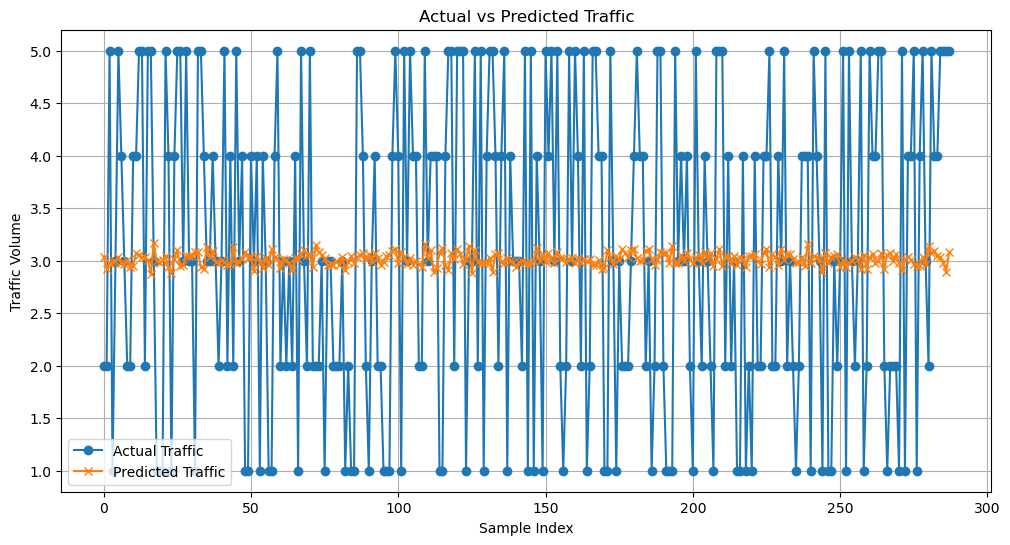

In [16]:
# Create a DataFrame with actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df = results_df.reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(results_df['Actual'], label='Actual Traffic', marker='o')
plt.plot(results_df['Predicted'], label='Predicted Traffic', marker='x')
plt.title('Actual vs Predicted Traffic')
plt.xlabel('Sample Index')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

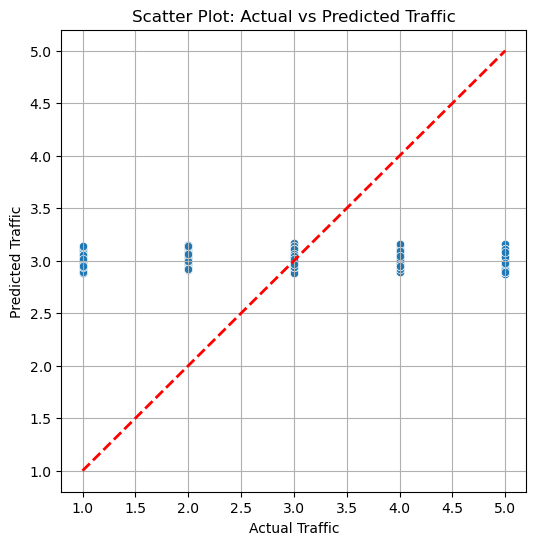

In [17]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         'r--', lw=2)
plt.title('Scatter Plot: Actual vs Predicted Traffic')
plt.xlabel('Actual Traffic')
plt.ylabel('Predicted Traffic')
plt.grid(True)
plt.show()

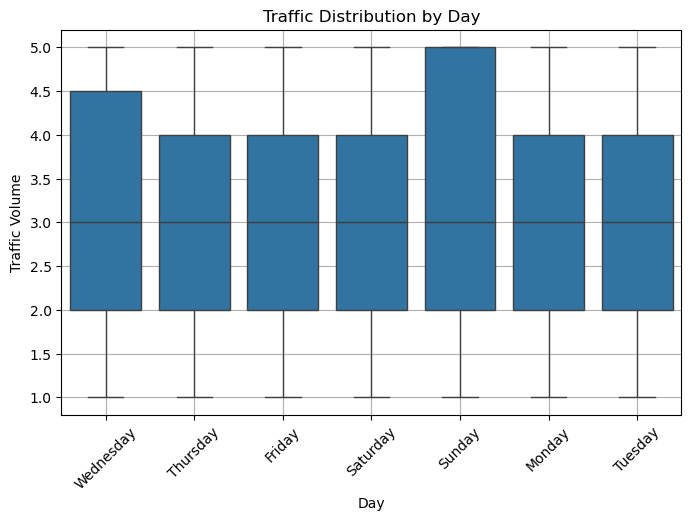

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Day', y='Traffic', data=df)
plt.title('Traffic Distribution by Day')
plt.xticks(rotation=45)
plt.ylabel('Traffic Volume')
plt.xlabel('Day')
plt.grid(True)
plt.show()